# PROJECT

- 1.The aim is to predict the price of used cars as per the data set having prior knowledge using some features like fuel type, kms driven etc.
- 2.The number of people who prefer which fuel type from visualizing data.


# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
car = pd.read_csv("C:/Users\CHIRAG\Downloads\car_prediction.csv")
car.head()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,Mahindra Xuv500 (2013),W8 Dual Tone,DIESEL,"58,000 KM",MANUAL,1st Owner,"Pitampura, Delhi",01/27/2022,435000
1,Hyundai Creta (2020),1.6 SX Option Executive Diesel,DIESEL,43861.0 KM,MANUAL,1st Owner,"Ahiritola, Kolkata",01/23/2022,1165101
2,Hyundai Verna (2019),VTVT 1.4 EX,PETROL,"17,000 KM",MANUAL,2nd Owner,"Chelavoor, Pantheeramkavu",01/25/2022,815000
3,Datsun Redigo (2020),D,PETROL,10000 KM,MANUAL,1st Owner,"Palam, Delhi",01/13/2022,270000
4,Hyundai I10 (2011),Sportz 1.1 iRDE2,PETROL,70000 KM,MANUAL,1st Owner,"Dwarka Sector 13, Delhi",01/13/2022,185000


# Statistics Data Infomation

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand & Model       5050 non-null   object
 1   Varient             5011 non-null   object
 2   Fuel Type           5050 non-null   object
 3   Driven Kilometers   5050 non-null   object
 4   Transmission        5050 non-null   object
 5   Owner               5050 non-null   object
 6   Location            5050 non-null   object
 7   Date of Posting Ad  5050 non-null   object
 8   Price (in ₹)        5050 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 355.2+ KB


In [4]:
car.shape

(5050, 9)

# Preprocessing for cleaning

In [5]:
#Checking for Null values
car.isnull().sum()

Brand & Model          0
Varient               39
Fuel Type              0
Driven Kilometers      0
Transmission           0
Owner                  0
Location               0
Date of Posting Ad     0
Price (in ₹)           0
dtype: int64

In [6]:
car.columns

Index(['Brand & Model', 'Varient', 'Fuel Type', 'Driven Kilometers',
       'Transmission', 'Owner', 'Location', 'Date of Posting Ad',
       'Price (in ₹)'],
      dtype='object')

In [7]:
car['Price (in ₹)'].unique()

array([ 435000, 1165101,  815000,  270000,  185000,  740000,  418500,
        480000,  320000,  490000, 1025000,  420000,  540000,  600000,
        530000,  150000,  165000,  329000,  450000,  595000,  520000,
        775000,   15000,  315000, 1095000, 1775000,   38000,   73000,
        425000,  675000,  220000,  230000,  380000,  180000,   65000,
         70000,  750000, 1950000,  725000,  290000,  127000,  415000,
        171000,  210000,  260000,  580000,  399999,  780000, 1675000,
        225000,  296000, 3200000,   99999,  222000,  170000,  910000,
        850000,  965000,  350000,  525000,  985000, 3500000,   85000,
         49999, 1585000, 2350000,  475000,  485000,  110000,  400000,
        465000,  200000,   35000,  235000,  175000, 1600000,  645000,
        280000, 2100000,  620000, 1750000, 2400000,  500000, 2899999,
        370000,  800000,  493000,   90000,  345000, 1200000, 1550000,
        410000, 4850000, 1499000,  379000,  899999, 3450000,  289000,
        340000,  538

In [8]:
car['Driven Kilometers'].unique()

array(['58,000 KM', '43861.0 KM', '17,000 KM', '10000 KM', '70000 KM',
       '140,000 KM', '22464.0 KM', '84,000 KM', '93,000 KM', '149,000 KM',
       '64000.0 KM', '31000.0 KM', '161000.0 KM', '118642.0 KM',
       '95000.0 KM', '50000 KM', '20000 KM', '52,300 KM', '78,956 KM',
       '59000.0 KM', '17000.0 KM', '59,000 KM', '0 KM', '14,800 KM',
       '41545.0 KM', '18,000 KM', '115635.0 KM', '73000.0 KM',
       '19018.0 KM', '63000.0 KM', '90000 KM', '120000 KM', '90,320 KM',
       '125,250 KM', '75,000 KM', '4,000 KM', '1.0 KM', '67,000 KM',
       '79300.0 KM', '83,000 KM', '42,000 KM', '115,625 KM', '120,000 KM',
       '81,321 KM', '63,800 KM', '62000.0 KM', '170,000 KM', '85000.0 KM',
       '80000.0 KM', '28000.0 KM', '98,000 KM', '72,000 KM', '80,000 KM',
       '142,000 KM', '200,000 KM', '35,000 KM', '206167.0 KM',
       '150000.0 KM', '6,000 KM', '160000 KM', '85249.0 KM',
       '115000.0 KM', '55,000 KM', '85,000 KM', '68790.0 KM',
       '35000.0 KM', '45000.0 KM',

In [9]:
car['Brand & Model'].unique()

array(['Mahindra Xuv500 (2013)', 'Hyundai Creta (2020)',
       'Hyundai Verna (2019)', 'Datsun Redigo (2020)',
       'Hyundai I10 (2011)', 'Toyota Innova (2011)',
       'Maruti Suzuki Wagon R (2017)', 'Maruti Suzuki Swift (2016)',
       'Maruti Suzuki Swift (2013)', 'Chevrolet Tavera Neo (2015)',
       'Bmw 5 Series (2012)', 'Nissan Micra (2016)',
       'Maruti Suzuki Swift Dzire (2013)', 'Tata Safari Storme (2015)',
       'Tata Safari Storme (2014)', 'Hyundai I10 (2010)',
       'Maruti Suzuki Alto 800 (2012)', 'Mercedes-Benz S-Class (2004)',
       'Maruti Suzuki Swift Dzire (2014)', 'Ssangyong Rexton (2013)',
       'Honda Amaze (2015)', 'Tata Nexon (2019)', 'Tata Indica (2000)',
       'Maruti Suzuki Alto 800 (2017)', 'Hyundai Creta (2017)',
       'Mahindra Scorpio (2020)', 'Maruti Suzuki Baleno (2020)',
       'Hyundai Santro (2001)', 'Hyundai Santa Fe (2012)',
       'Fiat Avventura (2015)', 'Maruti Suzuki Alto 800 (2015)',
       'Renault Kwid (2016)', 'Maruti Suzuki Wag

In [10]:
car['Fuel Type'].unique()

array(['DIESEL', 'PETROL', 'CNG', 'LPG', 'CNG & HYBRIDS', 'Diesel',
       'Petrol', 'Petrol + CNG', 'CNG & Hybrids'], dtype=object)

## Data Cleaning
9 columns
- 'Brand & Model' : It gives us the brand of the car alongwith its model name and manufacturing year
- 'Varient' : It gives us the varient of particular car model
- 'Fuel Type' : It gives us the type of fuel used by the car
- 'Driven Kilometers' : It gives us the total distance in kms covered by car
- 'Transmission' : It tells us whether the gear transmission is Manual or Automatic
- 'Owner' : It tells us the total numbers of owners car had previously
- 'Location' : It gives us the locaion of the car
- 'Date of Posting Ad' : It teels us when the advertisement for selling that car was posted online
- 'Price (in ₹)' : It gives us the price of the car.

In [12]:
backup=car.copy()

<AxesSubplot:>

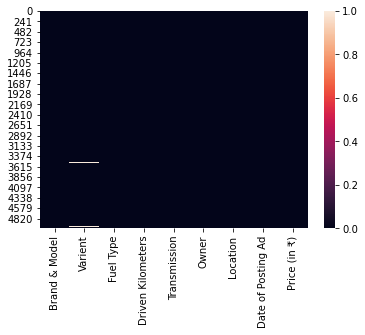

In [11]:
sn.heatmap(car.isnull())

In [12]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
car['Varient']=imp.fit_transform(car['Varient'].values.reshape(-1,1))

In [13]:
le = LabelEncoder()
for column in car.drop(['Price (in ₹)'],axis=1).columns:
    car[column]=le.fit_transform(car[column])
car

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,266,143,3,543,10,1,123,31,435000
1,243,22,3,419,10,1,2,28,1165101
2,255,130,6,159,10,2,33,30,815000
3,226,79,6,80,10,1,115,20,270000
4,246,121,6,656,10,1,42,20,185000
...,...,...,...,...,...,...,...,...,...
5045,358,87,5,484,6,1,6,28,50000
5046,375,56,4,97,12,1,81,28,320000
5047,351,122,7,472,6,1,126,28,599000
5048,353,131,7,586,12,1,87,31,395000


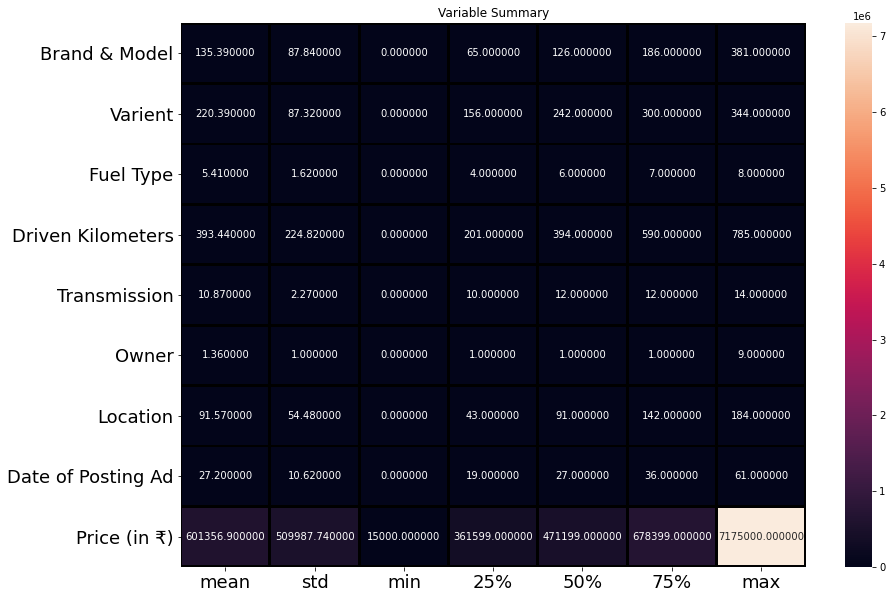

In [14]:
plt.figure(figsize=(14,10))
sn.heatmap(round(car.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

In [15]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Brand & Model       5050 non-null   int32
 1   Varient             5050 non-null   int32
 2   Fuel Type           5050 non-null   int32
 3   Driven Kilometers   5050 non-null   int32
 4   Transmission        5050 non-null   int32
 5   Owner               5050 non-null   int32
 6   Location            5050 non-null   int32
 7   Date of Posting Ad  5050 non-null   int32
 8   Price (in ₹)        5050 non-null   int64
dtypes: int32(8), int64(1)
memory usage: 197.4 KB


In [16]:
car.describe()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5.050000e+03
mean,135.385743,220.393069,5.414059,393.438416,10.869901,1.358218,91.566337,27.202772,6.013569e+05
std,87.839967,87.321643,1.622358,224.821809,2.266356,1.003360,54.478849,10.618227,5.099877e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+04
25%,65.000000,156.000000,4.000000,201.000000,10.000000,1.000000,43.000000,19.000000,3.615990e+05
50%,126.000000,242.000000,6.000000,394.000000,12.000000,1.000000,91.000000,27.000000,4.711990e+05
75%,186.000000,300.000000,7.000000,590.000000,12.000000,1.000000,142.000000,36.000000,6.783990e+05
max,381.000000,344.000000,8.000000,785.000000,14.000000,9.000000,184.000000,61.000000,7.175000e+06


# Cleaned data

In [17]:
car

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,266,143,3,543,10,1,123,31,435000
1,243,22,3,419,10,1,2,28,1165101
2,255,130,6,159,10,2,33,30,815000
3,226,79,6,80,10,1,115,20,270000
4,246,121,6,656,10,1,42,20,185000
...,...,...,...,...,...,...,...,...,...
5045,358,87,5,484,6,1,6,28,50000
5046,375,56,4,97,12,1,81,28,320000
5047,351,122,7,472,6,1,126,28,599000
5048,353,131,7,586,12,1,87,31,395000


# Data Visualizing

<AxesSubplot:>

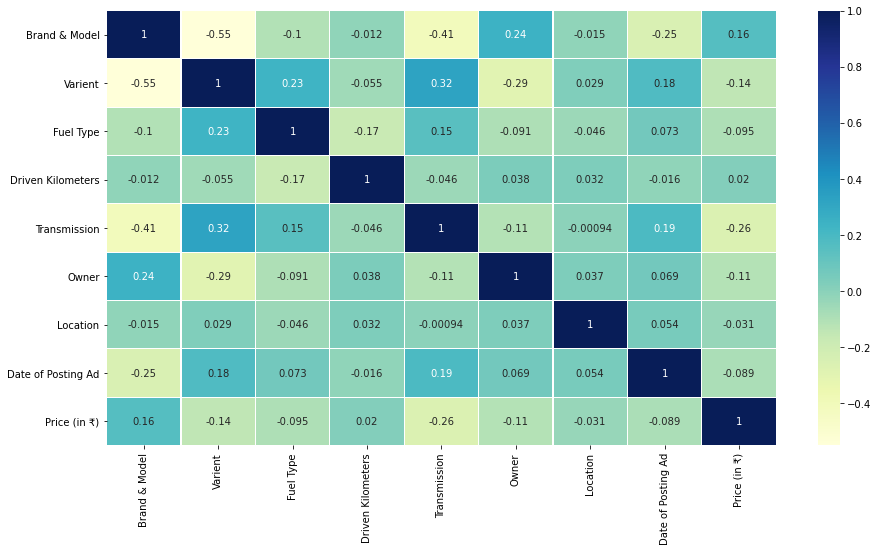

In [18]:
plt.figure(figsize=(15,8))
sn.heatmap(car.corr(), linewidth=0.1, cmap="YlGnBu", annot = True)

<AxesSubplot:xlabel='Fuel Type', ylabel='Density'>

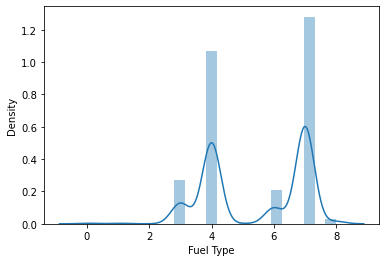

In [19]:
sn.distplot(car['Fuel Type'])

<AxesSubplot:xlabel='Price (in ₹)', ylabel='Density'>

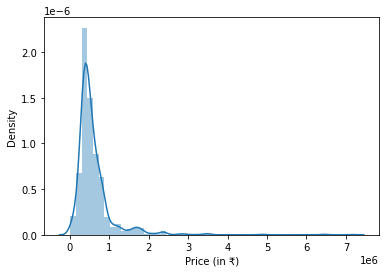

In [20]:
sn.distplot(car['Price (in ₹)'])

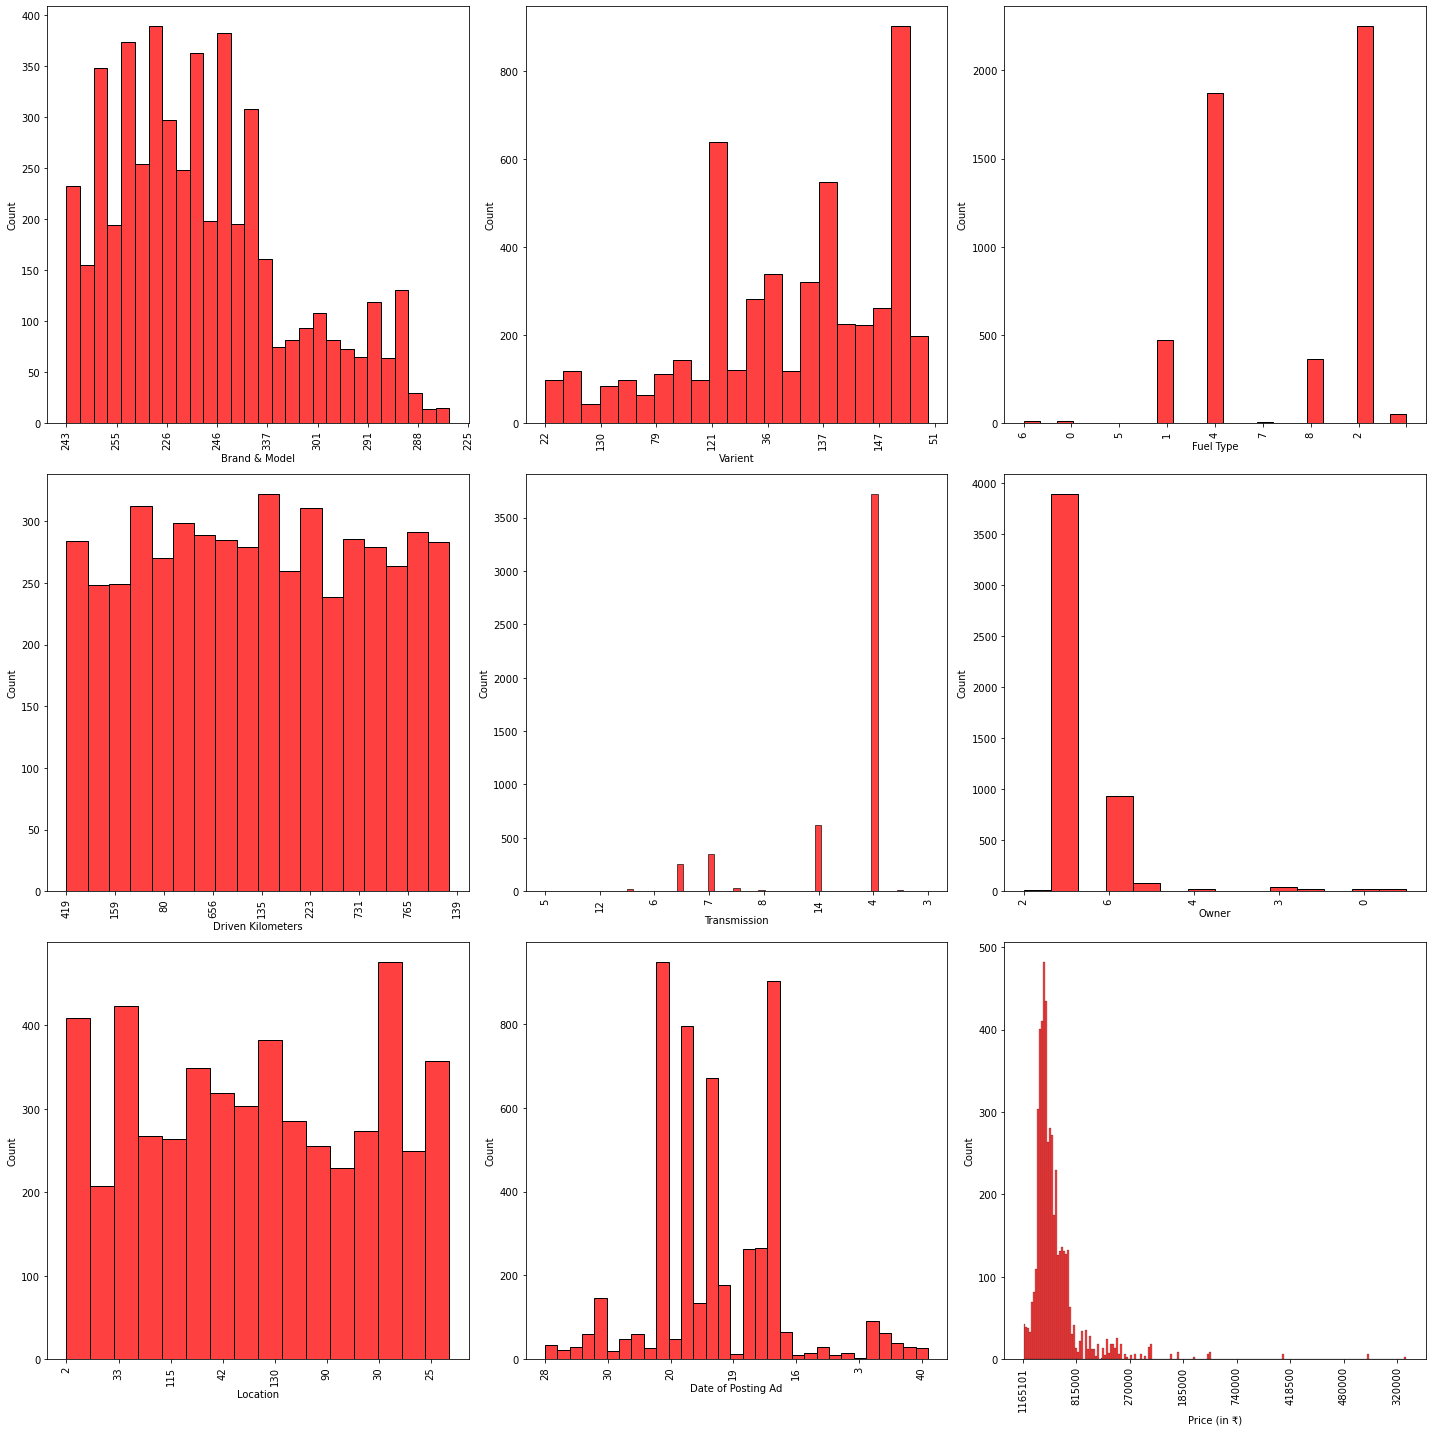

In [21]:
collist=car.columns.values
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(3,3,i+1)
    sn.histplot(data=car[collist[i]],color='red').set_xticklabels(labels=car[collist[i]].unique(),rotation=90)
    plt.tight_layout()

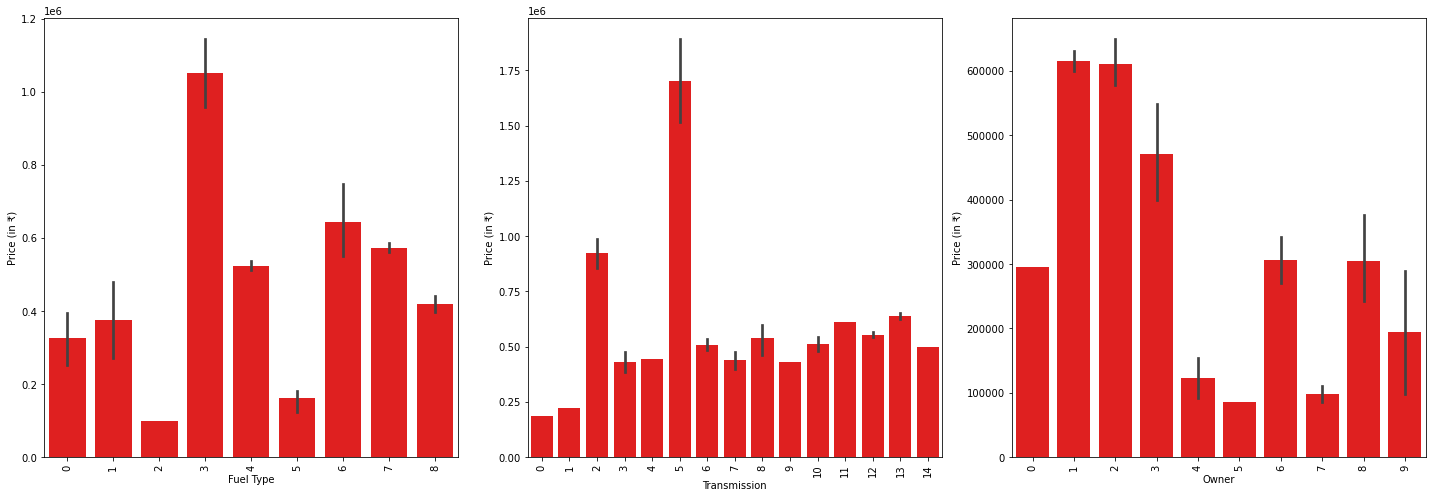

In [22]:
newcollist=['Fuel Type','Transmission','Owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sn.barplot(data=car,x=i[1],y='Price (in ₹)',color='red')
    plt.xticks(rotation=90)
    plt.tight_layout()

# Model Building

In [23]:
x= car.drop(['Price (in ₹)'],axis=1)
y=car['Price (in ₹)']

In [24]:
x=power_transform(x,method='yeo-johnson')
scale = StandardScaler()
x=scale.fit_transform(x)

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 45)
svr = SVR()
svr.fit(xtrain,ytrain)
pred_train_svr=svr.predict(xtrain)
pred_test_svr=svr.predict(xtest)
print('SVR Regressor Score:',svr.score(xtrain,ytrain))
print('SVR Regressor r2_score:',r2_score(ytest,pred_test_svr))
print("Mean squared error of SVR Regressor:",mean_squared_error(ytest,pred_test_svr))
print("Root Mean Square error of SVR Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_svr)))

SVR Regressor Score: -0.06325370730174851
SVR Regressor r2_score: -0.06820672247987791
Mean squared error of SVR Regressor: 297284446193.9865
Root Mean Square error of SVR Regressor: 545237.9720764012


In [26]:
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print('Linear Regression Score:',lr.score(xtrain,ytrain))
print('Linear Regression r2_score:',r2_score(ytest,pred_test))
print("Mean squared error of Linear Regression:",mean_squared_error(ytest,pred_test))
print("Root Mean Square error of Linear Regression:",np.sqrt(mean_squared_error(ytest,pred_test)))

Linear Regression Score: 0.055020586349048384
Linear Regression r2_score: 0.061364713139148486
Mean squared error of Linear Regression: 261224410556.7481
Root Mean Square error of Linear Regression: 511101.1744818712


In [27]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
pred_train_sgd=sgd.predict(xtrain)
pred_test_sgd=sgd.predict(xtest)
print('SGD Regressor Score:',sgd.score(xtrain,ytrain))
print('SGD Regressor r2_score:',r2_score(ytest,pred_test_sgd))
print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))

SGD Regressor Score: 0.05464314355374378
SGD Regressor r2_score: 0.06117735067154739
Mean squared error of SGD Regressor: 261276553972.66766
Root Mean Square error of SGD Regressor: 511152.1827916493


In [28]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
pred_train_knr=knr.predict(xtrain)
pred_test_knr=knr.predict(xtest)
print('K Neighbors Regressor Score:',knr.score(xtrain,ytrain))
print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))
print("Mean squared error of K Neighbors Regressor:",mean_squared_error(ytest,pred_test_knr))
print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_knr)))

K Neighbors Regressor Score: 0.748266387098428
K Neighbors Regressor r2_score: 0.6042476227806619
Mean squared error of K Neighbors Regressor: 110138818466.21764
Root Mean Square error of K Neighbors Regressor: 331871.68976310355


In [29]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
pred_train_dtr=dtr.predict(xtrain)
pred_test_dtr=dtr.predict(xtest)
print('Decision Tree Regressor Score:',dtr.score(xtrain,ytrain))
print('Decision Tree Regressor r2_score:',r2_score(ytest,pred_test_dtr))
print("Mean squared error of Decision Tree Regressor:",mean_squared_error(ytest,pred_test_dtr))
print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_dtr)))

Decision Tree Regressor Score: 0.9979397374843745
Decision Tree Regressor r2_score: 0.8184316547263707
Mean squared error of Decision Tree Regressor: 50530898032.28251
Root Mean Square error of Decision Tree Regressor: 224790.78724957237


In [30]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
print('Random Forest Regressor Score:',rf.score(xtrain,ytrain))
print('Random Forest Regressor r2_score:',r2_score(ytest,pred_test_rf))
print("Mean squared error of Random Forest Regressor:",mean_squared_error(ytest,pred_test_rf))
print("Root Mean Square error of Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_rf)))

Random Forest Regressor Score: 0.9817688006335343
Random Forest Regressor r2_score: 0.8806595329237101
Mean squared error of Random Forest Regressor: 33212733000.72759
Root Mean Square error of Random Forest Regressor: 182243.6089434348


# Cross Validation Score

In [31]:
print('Cross Validation Score of SVR is',(cvs(svr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Linear Regression is',(cvs(lr,x,y,cv=5).mean())*100)
print('Cross Validation Score of SGD Regressor is',(cvs(sgd,x,y,cv=5).mean())*100)
print('Cross Validation Score of KNeighbors Regressor is',(cvs(knr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Decision Tree Regressor is',(cvs(dtr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Random Forest Regressor is',(cvs(rf,x,y,cv=5).mean())*100)

Cross Validation Score of SVR is -6.937914977243179
Cross Validation Score of Linear Regression is -3.979872647154285
Cross Validation Score of SGD Regressor is -3.0402215072155614
Cross Validation Score of KNeighbors Regressor is 41.907276781914064
Cross Validation Score of Decision Tree Regressor is 60.41317109803019
Cross Validation Score of Random Forest Regressor is 79.43901174089085


# Hyper Parameter Tuning

In [32]:
parameter = { 'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],}

gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [33]:
pricecar = RandomForestRegressor(bootstrap=False,min_samples_leaf=1,max_features='sqrt',min_samples_split=2)
pricecar.fit(xtrain,ytrain)
pred=pricecar.predict(xtest)
acc=r2_score(ytest,pred)
print('Score of Hyper Parameter Tuned Ranfom Forest Regressor is:',pricecar.score(xtrain,ytrain))
print('Accuracy for predicting price of car is', (acc*100),'%')
print("Mean squared error of Hyper Parameter Tuned Random Forest Regressor:",mean_squared_error(ytest,pred))
print("Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred)))

Score of Hyper Parameter Tuned Ranfom Forest Regressor is: 0.9979397374843745
Accuracy for predicting price of car is 87.52744279658428 %
Mean squared error of Hyper Parameter Tuned Random Forest Regressor: 34711420390.91697
Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor: 186310.01151553012


# Conclusion

In [34]:
a= np.array(ytest)
predicted = np.array(pricecar.predict(xtest))
Price=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Price

,Original,Predicted
0,675000,675000.0
1,619899,619899.0
2,528199,528199.0
3,380000,380000.0
4,303799,303799.0
...,...,...
1510,776799,776799.0
1511,384899,493592.0
1512,391599,521976.0
1513,502699,502699.0
